In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils.functions import *
from utils.view import *

1. Imagen de calibración
2. Obtener la matriz de homografía
3. Crear el Bird Eye View
4. Creación de la red CNN-YOLOv3 (Detección de personas)
5. Mapeo de vista original hacia Bird Eye View
6. Criterio de distancia entre dos puntos (Distancia Social)
7. Resultado final en video


#### 1. Prueba con imagen

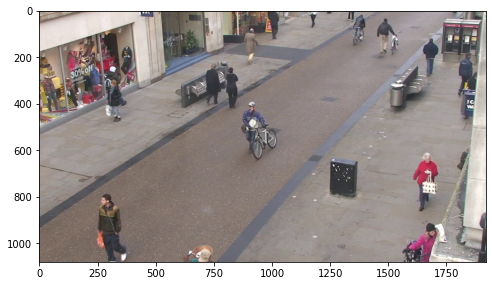

In [0]:
original = cv2.cvtColor(cv2.imread('multimedia/calibration_frame.jpg'), cv2.COLOR_BGR2RGB)
image_copy = original.copy()

plt.figure(figsize=(8,8))
plt.imshow(image_copy)
plt.show()

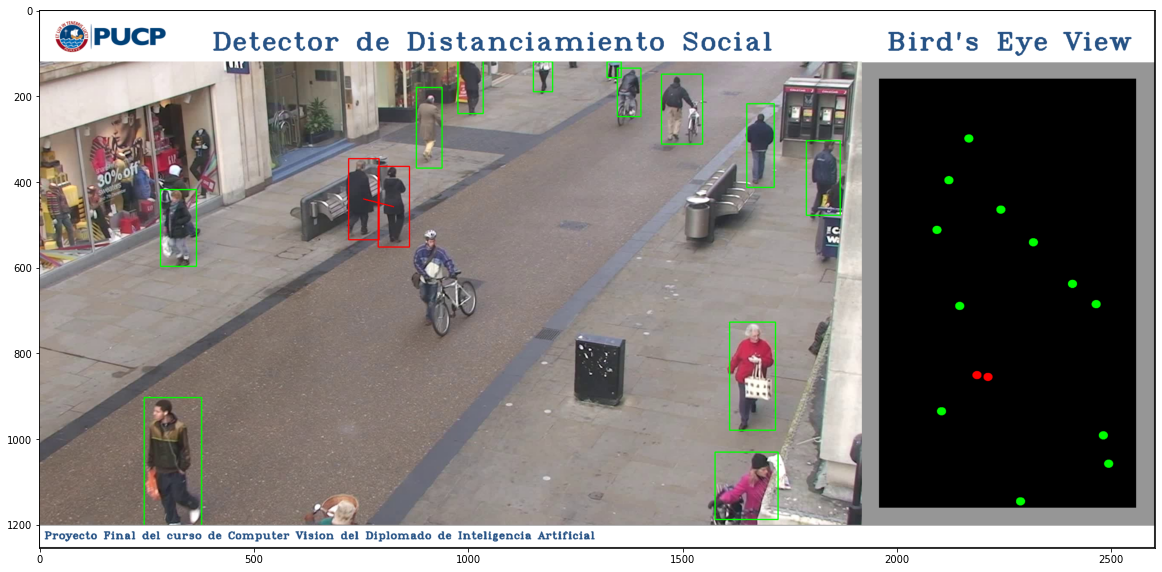

CPU times: user 4.52 s, sys: 132 ms, total: 4.65 s
Wall time: 2.9 s


In [0]:
%%time
confidence_threshold = 0.5
nms_threshold = 0.4
min_distance = 100
width = 416
height = 416

config = 'models/yolov3-608/yolov3.cfg'
weights = 'models/yolov3-608/yolov3.weights'
classes = 'models/yolov3-608/coco.names'

with open(classes, 'rt') as f:
    coco_classes = f.read().strip('\n').split('\n')

model = create_model(config, weights, use_gpu=False)
output_layers = get_output_layers(model)
blob = blob_from_image(image_copy, (width, height))
outputs = predict(blob, model, output_layers)
boxes, nms_boxes, class_ids = non_maximum_suppression(image_copy, outputs, confidence_threshold, nms_threshold)
person_boxes = get_domain_boxes(coco_classes, class_ids, nms_boxes, boxes, domain_class='person')

good, bad = people_distances_bird_eye_view(person_boxes, min_distance)
new_image  = draw_new_image_with_boxes(image_copy, good, bad, min_distance, draw_lines=True)

green_points = [g[6:] for g in good]
red_points = [r[6:] for r in bad]

picture = generate_picture()
bird_eye_view = generate_bird_eye_view(green_points, red_points)
img_final = generate_content_view(picture, new_image, bird_eye_view)

plt.figure(figsize=(20,20))
plt.imshow(img_final)
plt.show()

#### 2. Prueba con video

In [0]:
%%time
confidence_threshold = 0.5
nms_threshold = 0.4
min_distance = 115
width = 416
height = 416

config = 'models/yolov3-608/yolov3.cfg'
weights = 'models/yolov3-608/yolov3.weights'
classes = 'models/yolov3-608/coco.names'

with open(classes, 'rt') as f:
    coco_classes = f.read().strip('\n').split('\n')

writer = None
W = 2604
H = 1254    

    
model = create_model(config, weights, use_gpu=False)
output_layers = get_output_layers(model)

picture = generate_picture()

video = cv2.VideoCapture('multimedia/TownCentre-test.mp4')

while True:
  
  _,frame = video.read()
  
  if frame is None:
      break

  if writer is None:
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter('multimedia/output.avi', fourcc, 30, (W, H), True)

  image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  blob = blob_from_image(image, (width, height))
  outputs = predict(blob, model, output_layers)
  boxes, nms_boxes, class_ids = non_maximum_suppression(image, outputs, confidence_threshold, nms_threshold)
  person_boxes = get_domain_boxes(coco_classes, class_ids, nms_boxes, boxes, domain_class='person')

  good, bad = people_distances_bird_eye_view(person_boxes, min_distance)
  new_image  = draw_new_image_with_boxes(image, good, bad, min_distance, draw_lines=True)
  
  green_points = [g[6:] for g in good]
  red_points = [r[6:] for r in bad]

  bird_eye_view = generate_bird_eye_view(green_points, red_points)
  output_image = generate_content_view(picture, new_image, bird_eye_view)

  if writer is not None:
    #print(output_image.shape)
    writer.write(output_image[:,:,::-1])
      
if writer is not None:
  writer.release()

video.release()

(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2604, 3)
(1254, 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!cp multimedia/output.avi /content/drive/My\ Drive/output_v3.avi